<a href="https://colab.research.google.com/github/RioAccountant/03_SQL-Project-Digital-Media-Store/blob/main/Final_SQL_1_4_Chinook_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [ ]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!unzip -u chinook.zip


Archive:  chinook.zip


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 29 19:30 .
drwxr-xr-x 1 root root   4096 Oct 29 19:26 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 29 19:30 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 28 13:26 .config
drwxr-xr-x 1 root root   4096 Oct 28 13:27 sample_data


In [ ]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema


CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


###List of Tables & Missing EDR info:

In [ ]:
#Can we get a view of all the tables in list form?
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
# What are the additional fields[columns] not displayed on the ERD for Invoices & EE's
%%script sqlite3 --column --header chinook.db

PRAGMA table_info(invoices);
PRAGMA table_info(employees);
#Pragmatic information

cid  name               type           notnull  dflt_value  pk
---  -----------------  -------------  -------  ----------  --
0    InvoiceId          INTEGER        1                    1 
1    CustomerId         INTEGER        1                    0 
2    InvoiceDate        DATETIME       1                    0 
3    BillingAddress     NVARCHAR(70)   0                    0 
4    BillingCity        NVARCHAR(40)   0                    0 
5    BillingState       NVARCHAR(40)   0                    0 
6    BillingCountry     NVARCHAR(40)   0                    0 
7    BillingPostalCode  NVARCHAR(10)   0                    0 
8    Total              NUMERIC(10,2)  1                    0 
cid  name        type          notnull  dflt_value  pk
---  ----------  ------------  -------  ----------  --
0    EmployeeId  INTEGER       1                    1 
1    LastName    NVARCHAR(20)  1                    0 
2    FirstName   NVARCHAR(20)  1                    0 
3    Title       NVARCHAR(30)  0

#### SELECT (with * and with column names)


In [ ]:
#Musical Types List (Genre)=25-remind me of the primary classifications.
%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres


GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     
6        Blues             
7        Latin             
8        Reggae            
9        Pop               
10       Soundtrack        
11       Bossa Nova        
12       Easy Listening    
13       Heavy Metal       
14       R&B/Soul          
15       Electronica/Dance 
16       World             
17       Hip Hop/Rap       
18       Science Fiction   
19       TV Shows          
20       Sci Fi & Fantasy  
21       Drama             
22       Comedy            
23       Alternative       
24       Classical         
25       Opera             


In [ ]:
%%script sqlite3 --column --header chinook.db
#What are the media types?
SELECT *
FROM Media_types

MediaTypeId  Name                       
-----------  ---------------------------
1            MPEG audio file            
2            Protected AAC audio file   
3            Protected MPEG-4 video file
4            Purchased AAC audio file   
5            AAC audio file             


In [ ]:
%%script sqlite3 --column --header chinook.db
#Visual of invoice contents-note State not a required field and sadly staff is not using.
SELECT *
FROM invoices
limit 10;

InvoiceId  CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW           Edmonton     AB            Canada          T6G 2C7            8.91 
5          23          2009-01-11 00:00:00  69 Salem Street          Boston       MA            USA             2113               13.86
6          37          2009-01-19 00:00:0

#### OR

In [ ]:
%%script sqlite3 --column --header chinook.db
#Premium or discounted tracks? #Yes, there are items price differences, what are they? See next.
SELECT Trackid, UnitPrice
FROM invoice_items
WHERE UnitPrice > .99 OR UnitPrice < .99
limit 10;
#Premium or discounted tracks? I wonder how it is bifurcated?

TrackId  UnitPrice
-------  ---------
2820     1.99     
2826     1.99     
2832     1.99     
2838     1.99     
2844     1.99     
2850     1.99     
2856     1.99     
2862     1.99     
2868     1.99     
2874     1.99     


In [ ]:
%%script sqlite3 --column --header chinook.db
#look at this from the customer perspective aggregate, ties to above, and everything seems to be a multiple of 99 cents
SELECT I.InvoiceId, C.FirstName, C.LastName, sum(IT.UnitPrice * IT.Quantity) as Total
FROM invoice_items IT
INNER JOIN invoices I ON I.InvoiceId = IT.InvoiceId
INNER JOIN customers C ON C.CustomerId = I.CustomerId
GROUP BY I.InvoiceId, C.FirstName, C.LastName
limit 10;

InvoiceId  FirstName  LastName    Total
---------  ---------  ----------  -----
1          Leonie     Köhler      1.98 
2          Bjørn      Hansen      3.96 
3          Daan       Peeters     5.94 
4          Mark       Philips     8.91 
5          John       Gordon      13.86
6          Fynn       Zimmermann  0.99 
7          Niklas     Schröder    1.98 
8          Dominique  Lefebvre    1.98 
9          Wyatt      Girard      3.96 
10         Hugh       O'Reilly    5.94 


In [ ]:
%%script sqlite3 --column --header chinook.db
#Looking for fixed or variable cost per track; even with 100 I cannot confirm.
SELECT distinct albums.Title as Cover, tracks.Name as Song, tracks.UnitPrice
FROM invoice_items
INNER JOIN tracks ON tracks.TrackId = invoice_items.TrackId
INNER JOIN albums ON albums.AlbumId = tracks.AlbumId
limit 10;


Cover                                  Song                                     UnitPrice
-------------------------------------  ---------------------------------------  ---------
For Those About To Rock We Salute You  For Those About To Rock (We Salute You)  0.99     
Balls to the Wall                      Balls to the Wall                        0.99     
Restless and Wild                      Fast As a Shark                          0.99     
Restless and Wild                      Restless and Wild                        0.99     
Restless and Wild                      Princess of the Dawn                     0.99     
For Those About To Rock We Salute You  Put The Finger On You                    0.99     
For Those About To Rock We Salute You  Inject The Venom                         0.99     
For Those About To Rock We Salute You  Snowballed                               0.99     
For Those About To Rock We Salute You  Evil Walks                               0.99     
For Those 

In [ ]:
%%script sqlite3 --column --header chinook.db
#create temp tbl as ref to use later w/o the limit
SELECT * FROM
(SELECT distinct albums.Title as Cover, tracks.Name as Song, tracks.UnitPrice
FROM invoice_items
INNER JOIN tracks ON tracks.TrackId = invoice_items.TrackId
INNER JOIN albums ON albums.AlbumId = tracks.AlbumId
limit 25) ref


Cover                                  Song                                     UnitPrice
-------------------------------------  ---------------------------------------  ---------
For Those About To Rock We Salute You  For Those About To Rock (We Salute You)  0.99     
Balls to the Wall                      Balls to the Wall                        0.99     
Restless and Wild                      Fast As a Shark                          0.99     
Restless and Wild                      Restless and Wild                        0.99     
Restless and Wild                      Princess of the Dawn                     0.99     
For Those About To Rock We Salute You  Put The Finger On You                    0.99     
For Those About To Rock We Salute You  Inject The Venom                         0.99     
For Those About To Rock We Salute You  Snowballed                               0.99     
For Those About To Rock We Salute You  Evil Walks                               0.99     
For Those 

In [ ]:
%%script sqlite3 --column --header chinook.db
#Album Inventory-Details of the 347
SELECT AlbumID, Title as Album, ArtistID
FROM albums as album_inventory


AlbumId  Album                                                                                            ArtistId
-------  -----------------------------------------------------------------------------------------------  --------
1        For Those About To Rock We Salute You                                                            1       
2        Balls to the Wall                                                                                2       
3        Restless and Wild                                                                                2       
4        Let There Be Rock                                                                                1       
5        Big Ones                                                                                         3       
6        Jagged Little Pill                                                                               4       
7        Facelift                                                               

In [ ]:
#Is the employee base multinational? NO, all employees appear to be FROM Canada
%%script sqlite3 --column --header chinook.db
SELECT distinct country
FROM employees
ORDER BY country;

Country
-------
Canada 


In [ ]:
#WHERE in Canada?
%%script sqlite3 --column --header chinook.db
SELECT distinct city
FROM employees
ORDER BY city;

City      
----------
Calgary   
Edmonton  
Lethbridge


In [ ]:
#How many employees overall-we cannot know about active as there is not a term date? 8
%%script sqlite3 --column --header chinook.db
SELECT count(*)
FROM employees

count(*)
--------
8       


#### WHERE


In [ ]:
#Noted that Country could be null in customer Table; we need to make sure there are no nulls for any aggregations using this.
%%script sqlite3 --column --header chinook.db
SELECT count(*)
FROM customers
WHERE country is null

count(*)
--------
0       


#### WHERE with AND Combined

In [ ]:
%%script sqlite3 --column --header chinook.db
#Quasi price list employing WHERE to join to arrive at menu of pricing.
SELECT distinct media_types.MediaTypeid, media_types.Name, tracks.Genreid, genres.Name, tracks.UnitPrice
FROM media_types, tracks, genres
WHERE media_types.MediaTypeid = tracks.MediaTypeid AND genres.Genreid = tracks.Genreid;

MediaTypeId  Name                         GenreId  Name                UnitPrice
-----------  ---------------------------  -------  ------------------  ---------
1            MPEG audio file              1        Rock                0.99     
1            MPEG audio file              2        Jazz                0.99     
1            MPEG audio file              3        Metal               0.99     
1            MPEG audio file              4        Alternative & Punk  0.99     
1            MPEG audio file              5        Rock And Roll       0.99     
1            MPEG audio file              6        Blues               0.99     
1            MPEG audio file              7        Latin               0.99     
1            MPEG audio file              8        Reggae              0.99     
1            MPEG audio file              9        Pop                 0.99     
1            MPEG audio file              10       Soundtrack          0.99     
1            MPEG audio file

#### LIKE (with % or _ wildcard)


In [ ]:
#Are there any other customers with my name:Anna?
%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE FirstName LIKE 'A%' OR LastName LIKE 'Lov%'

CustomerId  FirstName  LastName  Company               Address                               City       State  Country  PostalCode  Phone               Fax                 Email                   SupportRepId
----------  ---------  --------  --------------------  ------------------------------------  ---------  -----  -------  ----------  ------------------  ------------------  ----------------------  ------------
7           Astrid     Gruber                          Rotenturmstraße 4, 1010 Innere Stadt  Vienne            Austria  1010        +43 01 5134505                          astrid.gruber@apple.at  5           
11          Alexandre  Rocha     Banco do Brasil S.A.  Av. Paulista, 2022                    São Paulo  SP     Brazil   01310-200   +55 (11) 3055-3278  +55 (11) 3055-8131  alero@uol.com.br        5           
32          Aaron      Mitchell                        696 Osborne Street                    Winnipeg   MB     Canada   R3L 2B9     +1 (204) 452-6452               

#### LIMIT



In [ ]:
#Total Sales by Customer and Country
%%script sqlite3 --column --header chinook.db


### Sorting and Grouping


In [ ]:
#Is this a multinational distributor? YES
%%script sqlite3 --column --header chinook.db
SELECT distinct country
FROM customers
ORDER BY country


Country       
--------------
Argentina     
Australia     
Austria       
Belgium       
Brazil        
Canada        
Chile         
Czech Republic
Denmark       
Finland       
France        
Germany       
Hungary       
India         
Ireland       
Italy         
Netherlands   
Norway        
Poland        
Portugal      
Spain         
Sweden        
USA           
United Kingdom


In [ ]:
#How many customers per country, if more than 1
%%script sqlite3 --column --header chinook.db
SELECT country, count(*)
  FROM customers
  group BY country
  having count(*) > 1
  ORDER BY count(*) DESC


Country         count(*)
--------------  --------
USA             13      
Canada          8       
France          5       
Brazil          5       
Germany         4       
United Kingdom  3       
Portugal        2       
India           2       
Czech Republic  2       


#### ORDER BY


In [ ]:
#Okay, now how many customers per country?
%%script sqlite3 --column --header chinook.db
SELECT country, count(*)
FROM customers
group BY country
ORDER BY count(*) DESC

Country         count(*)
--------------  --------
USA             13      
Canada          8       
France          5       
Brazil          5       
Germany         4       
United Kingdom  3       
Portugal        2       
India           2       
Czech Republic  2       
Sweden          1       
Spain           1       
Poland          1       
Norway          1       
Netherlands     1       
Italy           1       
Ireland         1       
Hungary         1       
Finland         1       
Denmark         1       
Chile           1       
Belgium         1       
Austria         1       
Australia       1       
Argentina       1       


#### SUM


In [ ]:
#Look at total sales BY Billing Country; not much is this a new company?  See MIN & MAX sale dates below
%%script sqlite3 --column --header chinook.db
SELECT billingcountry, sum(Total)
FROM invoices
group BY billingcountry
ORDER BY sum(Total) DESC

BillingCountry  sum(Total)
--------------  ----------
USA             523.06    
Canada          303.96    
France          195.1     
Brazil          190.1     
Germany         156.48    
United Kingdom  112.86    
Czech Republic  90.24     
Portugal        77.24     
India           75.26     
Chile           46.62     
Ireland         45.62     
Hungary         45.62     
Austria         42.62     
Finland         41.62     
Netherlands     40.62     
Norway          39.62     
Sweden          38.62     
Poland          37.62     
Italy           37.62     
Denmark         37.62     
Australia       37.62     
Argentina       37.62     
Spain           37.62     
Belgium         37.62     


#### DISTINCT


In [ ]:
#Are all employees in the same location? NO, looks like 3 different locations.
%%script sqlite3 --column --header chinook.db
SELECT distinct city, state, country
FROM employees
ORDER BY country;

City        State  Country
----------  -----  -------
Edmonton    AB     Canada 
Calgary     AB     Canada 
Lethbridge  AB     Canada 


#### MAX


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT MAX(InvoiceDate) AS LatestDate
FROM invoices;
#last sale date

LatestDate         
-------------------
2013-12-22 00:00:00


In [ ]:
#Which track comprises the MAX milliseconds?
%%script sqlite3 --column --header chinook.db
SELECT name, MediaTypeid, milliseconds
FROM tracks
WHERE milliseconds = (SELECT MAX(milliseconds) FROM tracks);

Name                    MediaTypeId  Milliseconds
----------------------  -----------  ------------
Occupation / Precipice  3            5286953     


#### MIN


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT MIN(InvoiceDate) AS EarliestDate
FROM invoices;
#first sale date

EarliestDate       
-------------------
2009-01-01 00:00:00


#### BETWEEN


In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT InvoiceDate, sum(Total)
FROM invoices
WHERE InvoiceDate BETWEEN "2009-01-01 00:00:00" AND "2013-12-31 00:00:00";

InvoiceDate          sum(Total)
-------------------  ----------
2009-01-01 00:00:00  2328.6    


#### GROUP BY



In [ ]:
#Total sales BY country
%%script sqlite3 --column --header chinook.db
SELECT BillingCountry, sum(Total)
FROM invoices
GROUP BY BillingCountry
ORDER BY sum(Total) DESC;

BillingCountry  sum(Total)
--------------  ----------
USA             523.06    
Canada          303.96    
France          195.1     
Brazil          190.1     
Germany         156.48    
United Kingdom  112.86    
Czech Republic  90.24     
Portugal        77.24     
India           75.26     
Chile           46.62     
Ireland         45.62     
Hungary         45.62     
Austria         42.62     
Finland         41.62     
Netherlands     40.62     
Norway          39.62     
Sweden          38.62     
Poland          37.62     
Italy           37.62     
Denmark         37.62     
Australia       37.62     
Argentina       37.62     
Spain           37.62     
Belgium         37.62     


#### AVG


In [ ]:
#Inception to Date, Average Order BY Country
%%script sqlite3 --column --header chinook.db
SELECT * FROM
(SELECT BillingCountry, ROUND(avg(Total), 2), sum(Total)
FROM invoices
GROUP BY BillingCountry
ORDER BY avg(Total)) Ref

BillingCountry  ROUND(avg(Total), 2)  sum(Total)
--------------  --------------------  ----------
Belgium         5.37                  37.62     
Spain           5.37                  37.62     
United Kingdom  5.37                  112.86    
Argentina       5.37                  37.62     
Australia       5.37                  37.62     
Denmark         5.37                  37.62     
Italy           5.37                  37.62     
Poland          5.37                  37.62     
Canada          5.43                  303.96    
Brazil          5.43                  190.1     
Portugal        5.52                  77.24     
Sweden          5.52                  38.62     
France          5.57                  195.1     
Germany         5.59                  156.48    
Norway          5.66                  39.62     
USA             5.75                  523.06    
India           5.79                  75.26     
Netherlands     5.8                   40.62     
Finland         5.95

In [ ]:
import sqlite3
#%%script sqlite3 --column --header chinook.db
conn = sqlite3.connect('chinook.db')

query = """
SELECT BillingCountry, ROUND(avg(Total), 2) as AVG, sum(Total) as 'TOTAL'
FROM invoices
GROUP BY BillingCountry
ORDER BY avg(TOTAL) DESC;
"""

df = pd.read_sql_query(query, conn)
df.shape

(24, 3)

In [ ]:
df=pd.read_sql_query(query, conn)
df_sorted=df.sort_values(by=['TOTAL'], ascending=False)

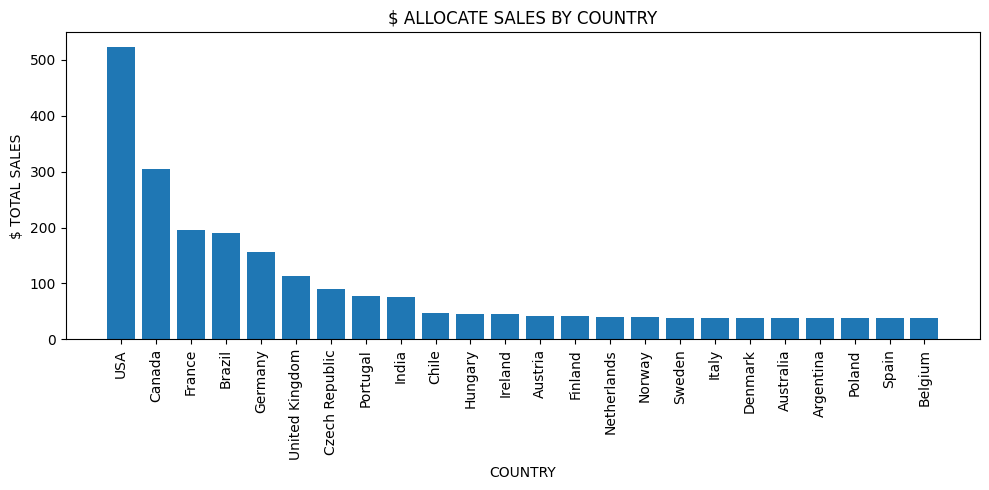

In [ ]:
#Plot
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['BillingCountry'], df_sorted['TOTAL'])
plt.xlabel('COUNTRY')
plt.ylabel('$ TOTAL SALES')
plt.title('$ ALLOCATE SALES BY COUNTRY')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Aggregates


In [ ]:
%%script sqlite3 --column --header chinook.db
#look at this from the customer perspective aggregate, ties to above, and everything seems to be a multiple of 99 cents
SELECT I.InvoiceId, C.FirstName, C.LastName, sum(IT.UnitPrice * IT.Quantity) as Total
FROM invoice_items IT
INNER JOIN invoices I ON I.InvoiceId = IT.InvoiceId
INNER JOIN customers C ON C.CustomerId = I.CustomerId
GROUP BY I.InvoiceId, C.FirstName, C.LastName
limit 10;

InvoiceId  FirstName  LastName    Total
---------  ---------  ----------  -----
1          Leonie     Köhler      1.98 
2          Bjørn      Hansen      3.96 
3          Daan       Peeters     5.94 
4          Mark       Philips     8.91 
5          John       Gordon      13.86
6          Fynn       Zimmermann  0.99 
7          Niklas     Schröder    1.98 
8          Dominique  Lefebvre    1.98 
9          Wyatt      Girard      3.96 
10         Hugh       O'Reilly    5.94 


#### COUNT



In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT count(distinct ArtistID) as artist_inventory
FROM `artists`
;

artist_inventory
----------------
275             


In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT count(distinct AlbumID) as album_inventory
FROM `albums`
;

album_inventory
---------------
347            


In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT count(distinct Customerid) as Customer_Count
FROM `customers`
;

Customer_Count
--------------
59            


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [ ]:
%%script sqlite3 --column --header chinook.db
#Looking for fixed or variable cost per track.
SELECT distinct albums.Title as Cover, tracks.Name as Song, tracks.UnitPrice
FROM invoice_items
INNER JOIN tracks ON tracks.TrackId = invoice_items.TrackId
INNER JOIN albums ON albums.AlbumId = tracks.AlbumId
WHERE tracks.UnitPrice > .99
ORDER BY Cover, Song;
#They look to be television series soundtracks, but we can confirm by adding the media type

Cover                                     Song                                     UnitPrice
----------------------------------------  ---------------------------------------  ---------
Aquaman                                   Pilot                                    1.99     
Battlestar Galactica (Classic), Season 1  Baltar's Escape                          1.99     
Battlestar Galactica (Classic), Season 1  Battlestar Galactica, Pt. 1              1.99     
Battlestar Galactica (Classic), Season 1  Battlestar Galactica, Pt. 2              1.99     
Battlestar Galactica (Classic), Season 1  Experiment In Terra                      1.99     
Battlestar Galactica (Classic), Season 1  Greetings from Earth, Pt. 1              1.99     
Battlestar Galactica (Classic), Season 1  Greetings from Earth, Pt. 2              1.99     
Battlestar Galactica (Classic), Season 1  Lost Planet of the Gods, Pt. 1           1.99     
Battlestar Galactica (Classic), Season 1  Lost Planet of the Gods, Pt.

In [ ]:
%%script sqlite3 --column --header chinook.db
#Ah, they are video files, makes sense-Join without Where
SELECT distinct albums.Title as Cover, tracks.Name as Song, media_types.Name as format, tracks.UnitPrice
FROM invoice_items
INNER JOIN tracks ON tracks.TrackId = invoice_items.TrackId
INNER JOIN albums ON albums.AlbumId = tracks.AlbumId
INNER JOIN Media_types ON media_types.MediaTypeid = tracks.MediaTypeid
WHERE tracks.UnitPrice > .99
ORDER BY Cover, Song;


Cover                                     Song                                     format                       UnitPrice
----------------------------------------  ---------------------------------------  ---------------------------  ---------
Aquaman                                   Pilot                                    Protected MPEG-4 video file  1.99     
Battlestar Galactica (Classic), Season 1  Baltar's Escape                          Protected MPEG-4 video file  1.99     
Battlestar Galactica (Classic), Season 1  Battlestar Galactica, Pt. 1              Protected MPEG-4 video file  1.99     
Battlestar Galactica (Classic), Season 1  Battlestar Galactica, Pt. 2              Protected MPEG-4 video file  1.99     
Battlestar Galactica (Classic), Season 1  Experiment In Terra                      Protected MPEG-4 video file  1.99     
Battlestar Galactica (Classic), Season 1  Greetings from Earth, Pt. 1              Protected MPEG-4 video file  1.99     
Battlestar Galactica (Cl